# Columbia Union Visitor

Overall, the OCR for this title is messy -- it appears that the OCR engine had trouble with the column breaks. 

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "CUV"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/baseline

Average verified rate: 0.9174753500833346

Average of error rates: 0.09053696

Total token count: 6484099



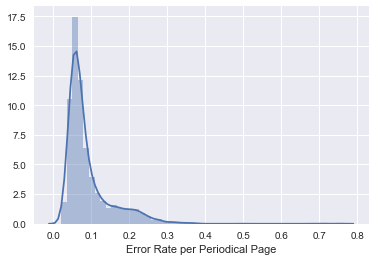

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 500 )

[('co', 19949),
 ('w', 14081),
 ('-', 13680),
 ('e', 13268),
 ('br', 9834),
 ('m', 8834),
 ('d', 7654),
 ('f', 7357),
 ('r', 7342),
 ('g', 7131),
 ("'", 6768),
 ('¥', 5964),
 ('re-', 5019),
 ('t', 4720),
 ('gc', 4452),
 ('con-', 4254),
 ('od', 4219),
 ('n', 3875),
 ('ñ', 3845),
 ('in-', 3327),
 ('tion', 3144),
 ('ck', 2989),
 ('be-', 2628),
 ('de-', 2034),
 ('pa', 1917),
 (')', 1884),
 ('ex-', 1788),
 ('k', 1740),
 ('ence', 1724),
 ('com-', 1721),
 ('mt', 1684),
 ('bf', 1518),
 ('en-', 1514),
 ('va', 1463),
 ('confer-', 1379),
 ('ment', 1358),
 ('ference', 1348),
 ('sab-', 1241),
 ('th', 1161),
 ('meet-', 1138),
 ('mis-', 1108),
 ('ad-', 1095),
 ('*', 1094),
 ('pro-', 1069),
 ("canvassers'", 1061),
 ('pre-', 1017),
 ('ers', 1016),
 ('peo-', 994),
 ('_', 970),
 ('at-', 967),
 ('ple', 961),
 ('ber', 922),
 ('ac-', 911),
 ('tions', 910),
 ('es', 892),
 ('un-', 868),
 ('col-', 839),
 ('im-', 818),
 ('dis-', 802),
 ('or-', 798),
 ('mem-', 794),
 ('(', 785),
 ('to-', 785),
 ('per-', 780),
 (

## Correction 1 -- Check for special character use

In [12]:
reports.tokens_with_special_characters(errors_summary)[:100]

[('¥', 5964),
 ('ñ', 3845),
 (')', 1884),
 ('*', 1094),
 ('_', 970),
 ('(', 785),
 ('/', 520),
 ('%', 470),
 ('ña', 312),
 ('ã', 297),
 ('¥¥', 275),
 ('ñthe', 272),
 ('(a)', 227),
 ('(b)', 212),
 ('*two', 196),
 ('=', 186),
 ('(for', 185),
 ('ñselected', 178),
 ('¡', 171),
 ('ñmrs', 148),
 ('`', 141),
 ('ñcom-', 134),
 ('(c)', 127),
 ('•', 126),
 ('+', 115),
 ('ñh', 114),
 ('(to', 110),
 ('ñcoming', 108),
 ('(academia', 102),
 ('(the', 101),
 (']', 90),
 ('ñw', 89),
 ('(columbia', 88),
 ('\\', 84),
 ('conferenceñmission', 84),
 ('(d)', 80),
 ('ñbible', 79),
 ('ñr', 78),
 ('❑', 78),
 ('(concluded)', 75),
 ('(continued', 74),
 ('¥the', 73),
 ('\ufeff', 72),
 ('a)', 72),
 ('ô', 68),
 ('second¥class', 68),
 ('*j', 64),
 ('(colored)', 63),
 ('(a', 63),
 ('¥¥¥', 59),
 ('[entered', 59),
 ('andñ', 59),
 ('continued)', 59),
 ('[', 58),
 ('*barnesville', 56),
 ('ñthat', 56),
 ('*broughton', 55),
 ('ñgreat', 55),
 ('_the', 55),
 ('the¥', 54),
 ('ñf', 54),
 ('the_', 54),
 ('>', 53),
 ('ñdied', 52)

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction1

Average verified rate: 0.9234446884710339

Average of error rates: 0.08394623999999999

Total token count: 6471517



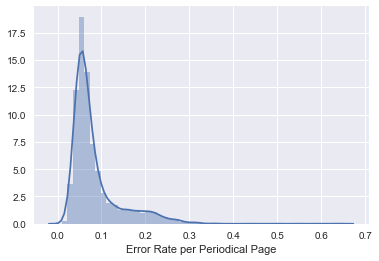

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('co', 19981),
 ('w', 14250),
 ('-', 14205),
 ('e', 13469),
 ('br', 9842),
 ('m', 8888),
 ('d', 7814),
 ('r', 7520),
 ('f', 7507),
 ('g', 7228),
 ("'", 7009),
 ('re-', 5029),
 ('t', 4825),
 ('gc', 4454),
 ('con-', 4258),
 ('od', 4229),
 ('n', 3927),
 ('in-', 3334),
 ('tion', 3152),
 ('ck', 2990),
 ('be-', 2632),
 ('de-', 2045),
 ('pa', 1925),
 ('com-', 1858),
 ('ex-', 1795),
 ('k', 1758),
 ('ence', 1726),
 ('mt', 1690),
 ('bf', 1519),
 ('en-', 1517),
 ('va', 1467),
 ('confer-', 1380),
 ('ment', 1362),
 ('ference', 1353),
 ('sab-', 1246),
 ('th', 1182),
 ('meet-', 1140),
 ('mis-', 1123),
 ('ad-', 1095),
 ('pro-', 1070),
 ("canvassers'", 1062),
 ('ers', 1021),
 ('pre-', 1019),
 ('peo-', 995),
 ('at-', 969),
 ('ple', 962),
 ('ber', 927),
 ('tions', 915),
 ('ac-', 913),
 ('es', 902)]

## Correction 2 -- Fix line endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction2

Average verified rate: 0.9530517833206363

Average of error rates: 0.05505456

Total token count: 6332232



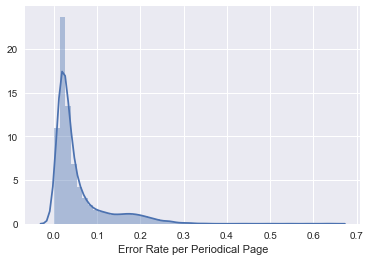

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('co', 19976),
 ('w', 14245),
 ('-', 14088),
 ('e', 13462),
 ('br', 9842),
 ('m', 8882),
 ('d', 7809),
 ('r', 7510),
 ('f', 7493),
 ('g', 7221),
 ("'", 7009),
 ('t', 4811),
 ('gc', 4454),
 ('od', 4224),
 ('n', 3924),
 ('ck', 2990),
 ('pa', 1926),
 ('k', 1757),
 ('mt', 1690),
 ('bf', 1519),
 ('va', 1467),
 ('th', 1181),
 ("canvassers'", 1100),
 ('es', 823),
 ('wm', 671),
 ("'the", 657),
 ('--', 633),
 ('u', 631),
 ('pg', 545),
 ('-the', 491),
 ('z', 481),
 ("the'", 396),
 ('sp', 371),
 ('hm', 362),
 ("'of", 347),
 ('sabbathschool', 329),
 ('x', 324),
 ('reichenbach', 307),
 ('ok', 292),
 ('mcelphatrick', 291),
 ('-of', 288),
 ('pp', 249),
 ('seventhday', 247),
 ("colporteurs'", 247),
 ("'and", 246),
 ('-and', 236),
 ('-to', 234),
 ('buttermore', 230),
 ('al', 222),
 ('-a', 218)]

## Correction 3 -- Remove extra quotation characters

In [19]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Correction 4 -- Address extra dashes

In [20]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction4

Average verified rate: 0.9602815412218036

Average of error rates: 0.047562560000000004

Total token count: 6340528



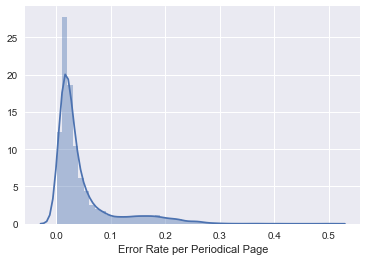

In [21]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [22]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('co', 20599),
 ('w', 14345),
 ('e', 13710),
 ('br', 9883),
 ('m', 8952),
 ('d', 7884),
 ('r', 7616),
 ('f', 7574),
 ('g', 7285),
 ("'", 6382),
 ('t', 4989),
 ('gc', 4462),
 ('od', 4234),
 ('n', 4006),
 ('ck', 2995),
 ('pa', 1946),
 ('k', 1779),
 ('mt', 1704),
 ('bf', 1522),
 ('va', 1472),
 ('th', 1236),
 ("canvassers'", 1079),
 ('es', 848),
 ('wm', 676),
 ('u', 656),
 ('pg', 545),
 ('z', 489),
 ('re', 474),
 ("the'", 385),
 ('sp', 375),
 ('hm', 365),
 ('x', 339),
 ('sabbathschool', 332),
 ('reichenbach', 307),
 ('ok', 297),
 ('mcelphatrick', 291),
 ('al', 257),
 ('pp', 253),
 ('seventhday', 251),
 ("colporteurs'", 247),
 ('buttermore', 230),
 ('nd', 226),
 ('cc', 213),
 ('ce', 210),
 ('bfl', 206),
 ('barto', 204),
 ("to'", 196),
 ('oertley', 189),
 ('ca', 187),
 ('wc', 186)]

## Correction 5 -- Address Burst Words

In [23]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction5

Average verified rate: 0.9602856941881112

Average of error rates: 0.047561599999999996

Total token count: 6340486



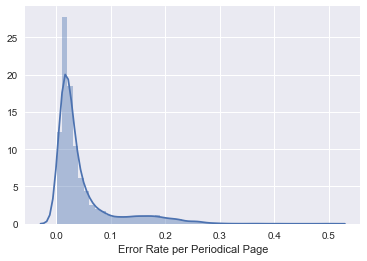

In [24]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [25]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('co', 20599),
 ('w', 14340),
 ('e', 13687),
 ('br', 9883),
 ('m', 8946),
 ('d', 7880),
 ('r', 7597),
 ('f', 7572),
 ('g', 7280),
 ("'", 6382),
 ('t', 4968),
 ('gc', 4462),
 ('od', 4234),
 ('n', 3996),
 ('ck', 2995),
 ('pa', 1946),
 ('k', 1776),
 ('mt', 1704),
 ('bf', 1522),
 ('va', 1472),
 ('th', 1236),
 ("canvassers'", 1079),
 ('es', 848),
 ('wm', 676),
 ('u', 653),
 ('pg', 545),
 ('z', 489),
 ('re', 475),
 ("the'", 385),
 ('sp', 375),
 ('hm', 365),
 ('x', 339),
 ('sabbathschool', 332),
 ('reichenbach', 307),
 ('ok', 297),
 ('mcelphatrick', 291),
 ('al', 256),
 ('pp', 253),
 ('seventhday', 251),
 ("colporteurs'", 247),
 ('buttermore', 230),
 ('nd', 226),
 ('cc', 213),
 ('ce', 210),
 ('bfl', 206),
 ('barto', 204),
 ("to'", 196),
 ('oertley', 189),
 ('ca', 187),
 ('wc', 186)]

## Correction 6 -- Address Split Words I

In [26]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction6

Average verified rate: 0.9608287928828794

Average of error rates: 0.04697536

Total token count: 6337844



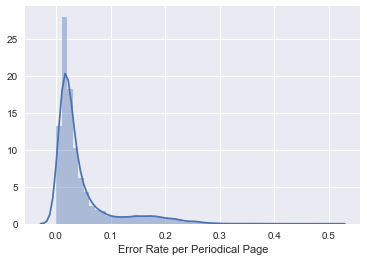

In [27]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [28]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('co', 20033),
 ('w', 14323),
 ('e', 13528),
 ('br', 9806),
 ('m', 8931),
 ('d', 7855),
 ('f', 7567),
 ('r', 7546),
 ('g', 7259),
 ("'", 6382),
 ('t', 4932),
 ('gc', 4423),
 ('od', 4173),
 ('n', 3966),
 ('ck', 2989),
 ('pa', 1934),
 ('k', 1764),
 ('mt', 1703),
 ('bf', 1522),
 ('va', 1466),
 ('th', 1150),
 ("canvassers'", 1079),
 ('es', 826),
 ('wm', 675),
 ('u', 647),
 ('pg', 545),
 ('z', 488),
 ("the'", 385),
 ('hm', 365),
 ('sp', 363),
 ('x', 338),
 ('sabbathschool', 332),
 ('reichenbach', 307),
 ('mcelphatrick', 291),
 ('ok', 287),
 ('re', 281),
 ('seventhday', 251),
 ('pp', 251),
 ("colporteurs'", 247),
 ('buttermore', 230),
 ('nd', 221),
 ('cc', 213),
 ('bfl', 206),
 ('barto', 204),
 ('al', 203),
 ('ce', 201),
 ("to'", 196),
 ('oertley', 189),
 ('wc', 186),
 ('q', 185)]

## Correction 7 -- Address Split Words II

In [29]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 7

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction7

Average verified rate: 0.9610930375444612

Average of error rates: 0.04669136

Total token count: 6336141



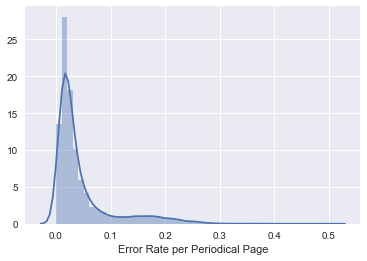

In [30]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [31]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('co', 20014),
 ('w', 14213),
 ('e', 13523),
 ('br', 9797),
 ('m', 8886),
 ('d', 7845),
 ('f', 7543),
 ('r', 7538),
 ('g', 7249),
 ("'", 6381),
 ('t', 4915),
 ('gc', 4423),
 ('od', 4168),
 ('n', 3956),
 ('ck', 2988),
 ('pa', 1933),
 ('k', 1760),
 ('mt', 1702),
 ('bf', 1522),
 ('va', 1465),
 ('th', 1134),
 ("canvassers'", 1077),
 ('es', 803),
 ('wm', 675),
 ('u', 611),
 ('pg', 545),
 ('z', 486),
 ("the'", 385),
 ('hm', 365),
 ('sp', 363),
 ('x', 338),
 ('sabbathschool', 332),
 ('reichenbach', 307),
 ('mcelphatrick', 291),
 ('ok', 285),
 ('seventhday', 251),
 ('pp', 250),
 ("colporteurs'", 247),
 ('buttermore', 230),
 ('cc', 208),
 ('bfl', 206),
 ('barto', 204),
 ("to'", 196),
 ('re', 195),
 ('oertley', 189),
 ('wc', 186),
 ('al', 186),
 ('q', 185),
 ('syphers', 182),
 ("''", 180)]

## Survey remaining errors

### Get docs with high error rate

In [32]:
messy_docs = reports.docs_with_high_error_rate( summary, min_error_rate = .2 )

In [33]:
docs_2_check = [x[0] for x in messy_docs if x[1] > 0.3]

In [34]:
docs_2_check

['CUV19120207-V17-06-page6.txt',
 'CUV19131224-V18-50-page2.txt',
 'CUV19131105-V18-44-page2.txt',
 'CUV19131210-V18-49-page4.txt',
 'CUV19131203-V18-48-page4.txt',
 'CUV19140211-V19-07-page4.txt',
 'CUV19160615-V21-24-page6.txt',
 'CUV19150819-V20-33-page6.txt']

In [35]:
# utilities.open_original_docs(docs_2_check, directories['cycle'])

The documents with high error rates are tables with canvasser information and images.

### Get long errors

In [36]:
reports.long_errors(errors_summary, min_length=15)

(['fairbanks-roosevelt',
  'raisingthelighthigher',
  'celestialvlidkiff',
  "north'philadelphia",
  'mionmenimmommmemmemmemmmom',
  'seventh-dayadventist',
  'ommemmomommommommummemn',
  "cenference'office",
  'oirecognitintiof',
  'vrafilaqdraining',
  'provirigtelaialvenderful',
  'idatinctibriihat',
  'recruiting-ground',
  'responsibilitity',
  'mmemmummmumnmemounmemmomm',
  'fellowpassengers',
  'has-treatment-rooms',
  "treasurer'sannualreport",
  "ofrathirn'alktlive",
  'thirteen-fourteen',
  'ethrindanclitient',
  'addre-ast-iviount',
  'colored-seventh-day',
  'otsligatoryunder',
  "the'determination",
  'amongunbelievers',
  'prayerlletlicated',
  'morningrollewing',
  'theresponsibility',
  'tolinnhleinadlaa',
  'frinnuittprigsfr',
  'memminimmemmemenmennmmemill',
  "the'mom'teffient'",
  'prograntprepared',
  'girtrudebillington',
  'mormiiiiiiiiiimiiiiii',
  'forweekendingmay',
  'generalqonference',
  'accomplishmentof',
  'positioniegarding',
  'nmemmememommemememmemmim

+ mommemmommmmmummmemmmem and other variations with long strings of "m". remove these to avoid noise.
Locate a series of "m"s within a token -- findall(r'([m+]{2,})') -- and check the length of the results -- if len(findall) > 3.

+ Split of long words will be difficult as there seems to be a combination of spelling errors and conjoined words.


## Correction 8 -- Remove long error tokens

In [37]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    sub_list = ["m|M", "i|I"]
    
    replacements = []
    for sub in sub_list:
        replacements.append(clean.check_for_repeating_characters(tokens, sub))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

CUV19060613-V10-24-page4.txt: [('Ammummamontommok', ' ')]
CUV19160921-V21-37-page8.txt: [('EIMIIIIIIIIII', ' ')]
CUV19160928-V21-38-page8.txt: [('HONSICIIIIIIMEIROMMINIIIIMMIll', ' ')]
CUV19161005-V21-39-page8.txt: [('OMMEMMOMOMMOMMOMMUMMEMN', ' ')]
CUV19161019-V21-41-page8.txt: [('MMIIIIIMMINUMBINIMMISMINIMMIMUNI', ' '), ('MMINIMEMIMMINIMMINIMMNIMMIMMIM', ' ')]
CUV19161116-V21-45-page8.txt: [('MEMOMMEMMEMMOD', ' '), ('MMEMEMENEEMEEMMEMEMEMMEMM', ' '), ('MMEMEMEMEMEMMEMEMMEMEEMEE', ' ')]
CUV19170104-V22-01-page8.txt: [('MMIIMMEMEMMEMEMINIMMOMMEMEMI', ' '), ('EMMEMMEMMWOMMEMMEMMIIIIMMO', ' ')]
CUV19170111-V22-02-page8.txt: [('IIIIIIIIIIIIIIIIIIIIIIIIINMIIIIIIIIIIIIIIII', ' ')]
CUV19170215-V22-07-page8.txt: [('INIMMEMMEMMEMMEMMEM', ' '), ('MMINIMMUMMEMEMMEMMUMMINIMME', ' '), ('MUMMINIMMINIMMUMMEMMUMMOIMMS', ' '), ('imummummummummummum', ' ')]
CUV19170222-V22-08-page8.txt: [('IIIMMOMMEMMENEMMEMOMMEMEMOM', ' '), ('MIRIMMOMMINIWORMEMEMEMMEMM', ' '), ('MOMMMEMMEMMINOMMEMINIMM', ' ')]
CUV1917

## Check Correction 8

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction8

Average verified rate: 0.961115032269591

Average of error rates: 0.046653120000000006

Total token count: 6335996



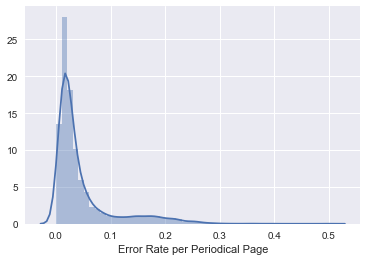

In [38]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [39]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('co', 20014),
 ('w', 14213),
 ('e', 13523),
 ('br', 9797),
 ('m', 8886),
 ('d', 7845),
 ('f', 7543),
 ('r', 7538),
 ('g', 7249),
 ("'", 6381),
 ('t', 4915),
 ('gc', 4423),
 ('od', 4168),
 ('n', 3956),
 ('ck', 2988),
 ('pa', 1933),
 ('k', 1760),
 ('mt', 1702),
 ('bf', 1522),
 ('va', 1465),
 ('th', 1134),
 ("canvassers'", 1077),
 ('es', 803),
 ('wm', 675),
 ('u', 611),
 ('pg', 545),
 ('z', 486),
 ("the'", 385),
 ('hm', 365),
 ('sp', 363),
 ('x', 338),
 ('sabbathschool', 332),
 ('reichenbach', 307),
 ('mcelphatrick', 291),
 ('ok', 285),
 ('seventhday', 251),
 ('pp', 250),
 ("colporteurs'", 247),
 ('buttermore', 230),
 ('cc', 208),
 ('bfl', 206),
 ('barto', 204),
 ("to'", 196),
 ('re', 195),
 ('oertley', 189),
 ('wc', 186),
 ('al', 186),
 ('q', 185),
 ('syphers', 182),
 ("''", 180)]

## Correction 9 -- Separate squashed words

In [40]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

CUV19030114-V07-01-page1.txt: [('faithfulthatpromised', 'faithful that promised')]
CUV19030225-V07-04-page1.txt: [('valuableassistance', 'valuable assistance')]
CUV19030520-V07-10-page4.txt: [('therealpossessionoftherealinher', 'the real possession of the real in her')]
CUV19030916-V07-25-page3.txt: [('hundredvisitseachweek', 'hundred visits each week')]
CUV19031104-V07-31-page3.txt: [('surroundingcountry', 'surrounding country')]
CUV19031216-V07-37-page1.txt: [('whentheworldarounduswillgive', 'when the world around us will give')]
CUV19040203-V08-05-page4.txt: [('Atthehomeofthebride', 'At the home of the bride')]
CUV19040217-V08-07-page3.txt: [('ourspiritualindolence', 'our spiritual indolence'), ('followingquotation', 'following quotation')]
CUV19040330-V08-13-page1.txt: [('delinquentchurches', 'delinquent churches')]
CUV19040413-V08-15-page2.txt: [('muchdifferentmotive', 'much different motive')]
CUV19040518-V08-20-page2.txt: [('couldconscientiously', 'could conscientiously')]
CUV19

## Check Correction 9

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/CUV/correction9

Average verified rate: 0.9611371116587403

Average of error rates: 0.04662848

Total token count: 6336405



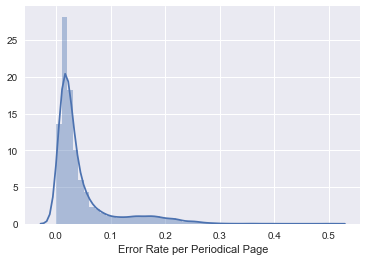

In [41]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [42]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:100]

[('co', 20014),
 ('w', 14213),
 ('e', 13533),
 ('br', 9797),
 ('m', 8888),
 ('d', 7846),
 ('f', 7546),
 ('r', 7538),
 ('g', 7250),
 ("'", 6381),
 ('t', 4920),
 ('gc', 4423),
 ('od', 4168),
 ('n', 3959),
 ('ck', 2988),
 ('pa', 1933),
 ('k', 1760),
 ('mt', 1702),
 ('bf', 1522),
 ('va', 1465),
 ('th', 1134),
 ("canvassers'", 1077),
 ('es', 803),
 ('wm', 675),
 ('u', 612),
 ('pg', 545),
 ('z', 487),
 ("the'", 385),
 ('hm', 365),
 ('sp', 363),
 ('x', 338),
 ('sabbathschool', 332),
 ('reichenbach', 307),
 ('mcelphatrick', 291),
 ('ok', 285),
 ('seventhday', 251),
 ('pp', 250),
 ("colporteurs'", 247),
 ('buttermore', 230),
 ('cc', 208),
 ('bfl', 206),
 ('barto', 204),
 ("to'", 196),
 ('re', 195),
 ('oertley', 189),
 ('wc', 186),
 ('al', 186),
 ('q', 185),
 ('syphers', 182),
 ("''", 180),
 ('ce', 178),
 ('nd', 174),
 ('phila', 172),
 ('tolliver', 169),
 ('charloe', 167),
 ('ca', 156),
 ('pengelly', 156),
 ('da', 155),
 ('dunkinson', 150),
 ("and'", 148),
 ('apsley', 145),
 ('silber', 144),
 ('